# Advanced Weather Analytics - Indian Weather 2021-2025
## Advanced Visualizations & Basic Analysis

This notebook explores Indian weather data using advanced visualization techniques including heatmaps, geographic maps, distributions, and time series analysis.

## 1. Import Libraries & Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Load data
df = pd.read_csv('indian_weather_2021_2025.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nCities: {df['City'].unique()}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (29216, 8)

Date range: 2021-01-01 to 2025-12-31

Cities: ['Ahmedabad' 'Bangalore' 'Bikaner' 'Chennai' 'Darjeeling' 'Delhi'
 'Hyderabad' 'Jaisalmer' 'Jodhpur' 'Kochi' 'Kolkata' 'Leh' 'Mumbai' 'Pune'
 'Shimla' 'Srinagar']

Columns: ['Date', 'City', 'Temperature_Min_C', 'Temperature_Max_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Weather_Condition']


## 2. Data Preparation & Basic Analytics

In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_Year'] = df['Date'].dt.dayofyear

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Add average temperature
df['Avg_Temp'] = (df['Temperature_Min_C'] + df['Temperature_Max_C']) / 2

# Get city coordinates for mapping
city_coords = {
    'Ahmedabad': (23.0225, 72.5714),
    'Bangalore': (12.9716, 77.5946),
    'Bikaner': (28.0229, 71.8237),
    'Chennai': (13.0827, 80.2707),
    'Darjeeling': (27.0360, 88.2605),
    'Delhi': (28.7041, 77.1025),
    'Hyderabad': (17.3850, 78.4867),
    'Jaisalmer': (26.9124, 70.9142),
    'Jodhpur': (26.2389, 73.0243),
    'Kochi': (9.9312, 76.2673),
    'Kolkata': (22.5726, 88.3639),
    'Leh': (34.1526, 77.5770),
    'Mumbai': (19.0760, 72.8777),
    'Pune': (18.5204, 73.8567),
    'Shimla': (31.7815, 77.1822),
    'Srinagar': (34.0837, 74.7973)
}

df['latitude'] = df['City'].map(lambda x: city_coords[x][0])
df['longitude'] = df['City'].map(lambda x: city_coords[x][1])

print("Data preparation complete!")
print(f"\nData shape: {df.shape}")
print(f"\nBasic Statistics:")
print(df[['Temperature_Min_C', 'Temperature_Max_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh']].describe())

Data preparation complete!

Data shape: (29216, 17)

Basic Statistics:
       Temperature_Min_C  Temperature_Max_C  Humidity_Percent   Rainfall_mm  \
count       29216.000000       29216.000000      29216.000000  29216.000000   
mean           17.165248          28.460525         60.044862      6.532913   
std             9.046966           9.270679         16.748836     20.750428   
min           -19.400000         -13.300000         20.000000      0.000000   
25%            12.100000          24.800000         47.800000      0.000000   
50%            18.900000          30.300000         61.300000      0.000000   
75%            24.100000          34.500000         72.400000      2.900000   
max            35.200000          52.300000        100.000000    425.500000   

       Wind_Speed_kmh  
count    29216.000000  
mean        13.859532  
std          5.508796  
min          0.000000  
25%          9.900000  
50%         13.300000  
75%         17.400000  
max         37.200000  


## 3. Heatmap Visualizations

### 3.1 Correlation Heatmap - Weather Variables


Correlation Matrix:
                   Temperature_Min_C  Temperature_Max_C  Avg_Temp  \
Temperature_Min_C           1.000000           0.867484  0.965461   
Temperature_Max_C           0.867484           1.000000  0.967135   
Avg_Temp                    0.965461           0.967135  1.000000   
Humidity_Percent            0.160368          -0.121436  0.018364   
Rainfall_mm                 0.135745          -0.010588  0.063836   
Wind_Speed_kmh              0.456925           0.348280  0.415953   

                   Humidity_Percent  Rainfall_mm  Wind_Speed_kmh  
Temperature_Min_C          0.160368     0.135745        0.456925  
Temperature_Max_C         -0.121436    -0.010588        0.348280  
Avg_Temp                   0.018364     0.063836        0.415953  
Humidity_Percent           1.000000     0.319127        0.022157  
Rainfall_mm                0.319127     1.000000        0.176859  
Wind_Speed_kmh             0.022157     0.176859        1.000000  


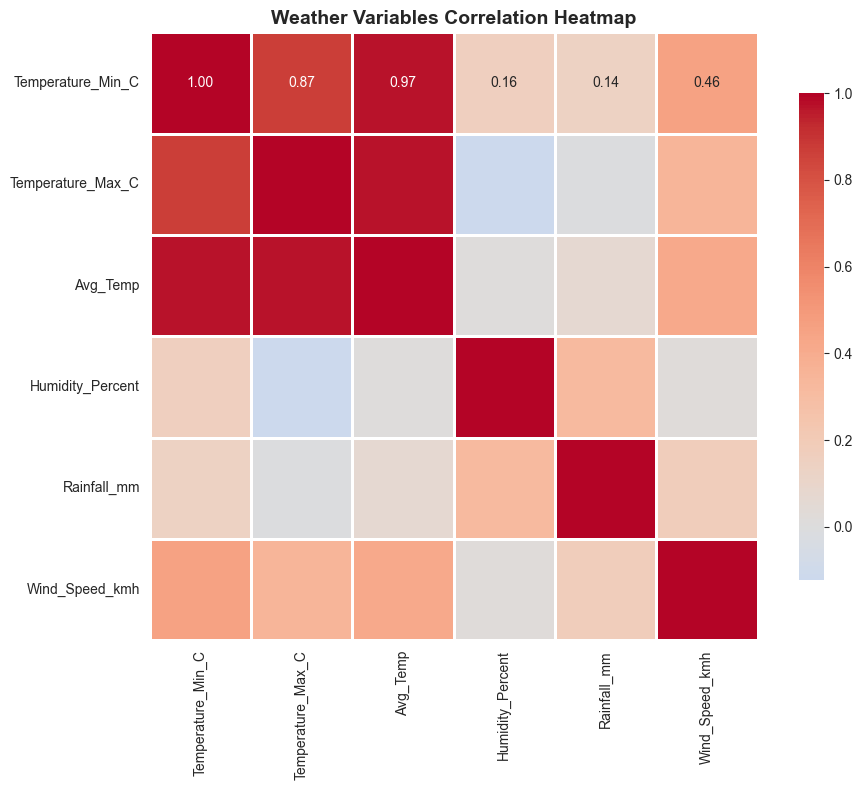


Key Correlations:
Humidity_Percent     1.000000
Rainfall_mm          0.319127
Temperature_Min_C    0.160368
Wind_Speed_kmh       0.022157
Avg_Temp             0.018364
Temperature_Max_C   -0.121436
Name: Humidity_Percent, dtype: float64
Rainfall_mm          1.000000
Humidity_Percent     0.319127
Wind_Speed_kmh       0.176859
Temperature_Min_C    0.135745
Avg_Temp             0.063836
Temperature_Max_C   -0.010588
Name: Rainfall_mm, dtype: float64


In [7]:
# Correlation matrix
numeric_cols = ['Temperature_Min_C', 'Temperature_Max_C', 'Avg_Temp', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh']
corr_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Weather Variables Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations:")
print(corr_matrix['Humidity_Percent'].sort_values(ascending=False))
print(corr_matrix['Rainfall_mm'].sort_values(ascending=False))

### 3.2 Temporal Heatmap - Average Temperature by City and Month


Average Temperature Pivot Table (Cities vs Months):
Month              1          2          3          4          5          6   \
City                                                                           
Ahmedabad   19.976129  22.828014  27.608387  31.519333  34.421613  33.035667   
Bangalore   20.983548  23.075532  26.070000  27.387000  27.092258  24.333333   
Bikaner     15.319677  18.520922  24.204839  31.159000  35.312903  36.211667   
Chennai     24.343548  26.086879  28.110000  30.878333  33.059677  31.966000   
Darjeeling   6.210968   7.086525  11.775161  14.460333  15.784839  16.435000   
Delhi       13.924839  17.092199  22.263226  28.467333  33.072581  34.156000   
Hyderabad   21.940968  24.625887  28.293871  30.926333  32.320968  29.470333   
Jaisalmer   15.727742  18.469504  24.423871  30.538667  35.100323  35.620333   
Jodhpur     16.373871  19.424468  24.906774  30.725667  33.996129  34.636667   
Kochi       27.003871  27.969149  29.021290  29.133000  28.965806  

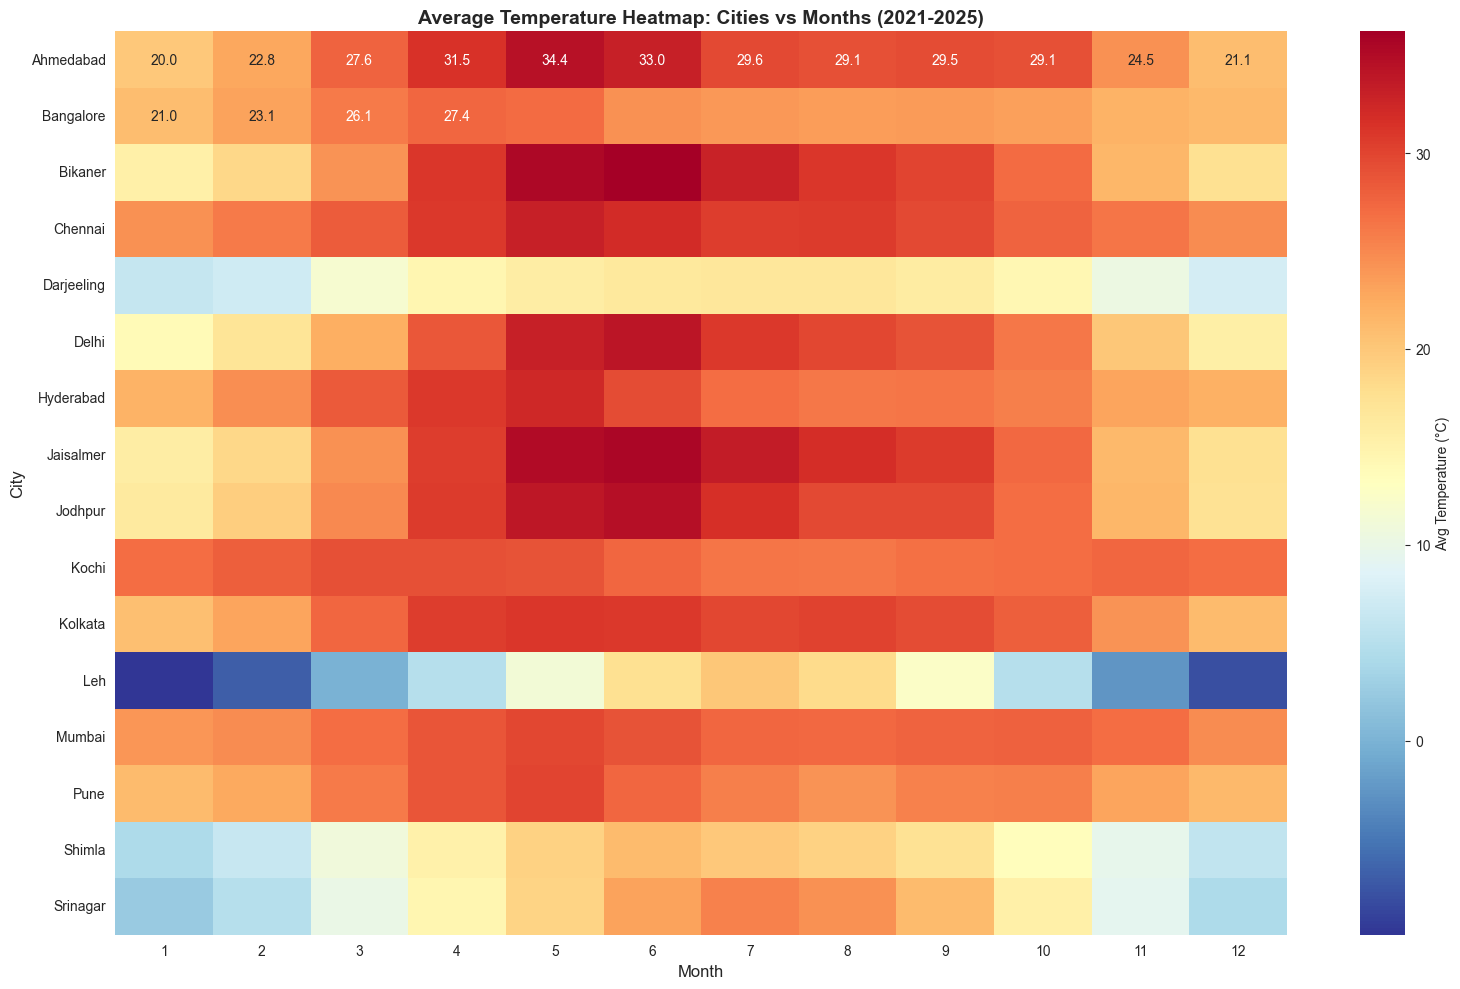

In [9]:
# Create pivot table: Cities vs Months (Average Temperature)
temp_pivot = df.groupby(['City', 'Month'])['Avg_Temp'].mean().unstack()
print("\nAverage Temperature Pivot Table (Cities vs Months):")
print(temp_pivot)
plt.figure(figsize=(16, 10))
sns.heatmap(temp_pivot, annot=True, fmt='.1f', cmap='RdYlBu_r', cbar_kws={'label': 'Avg Temperature (°C)'})
plt.title('Average Temperature Heatmap: Cities vs Months (2021-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

### 3.3 Temporal Heatmap - Humidity by City and Month

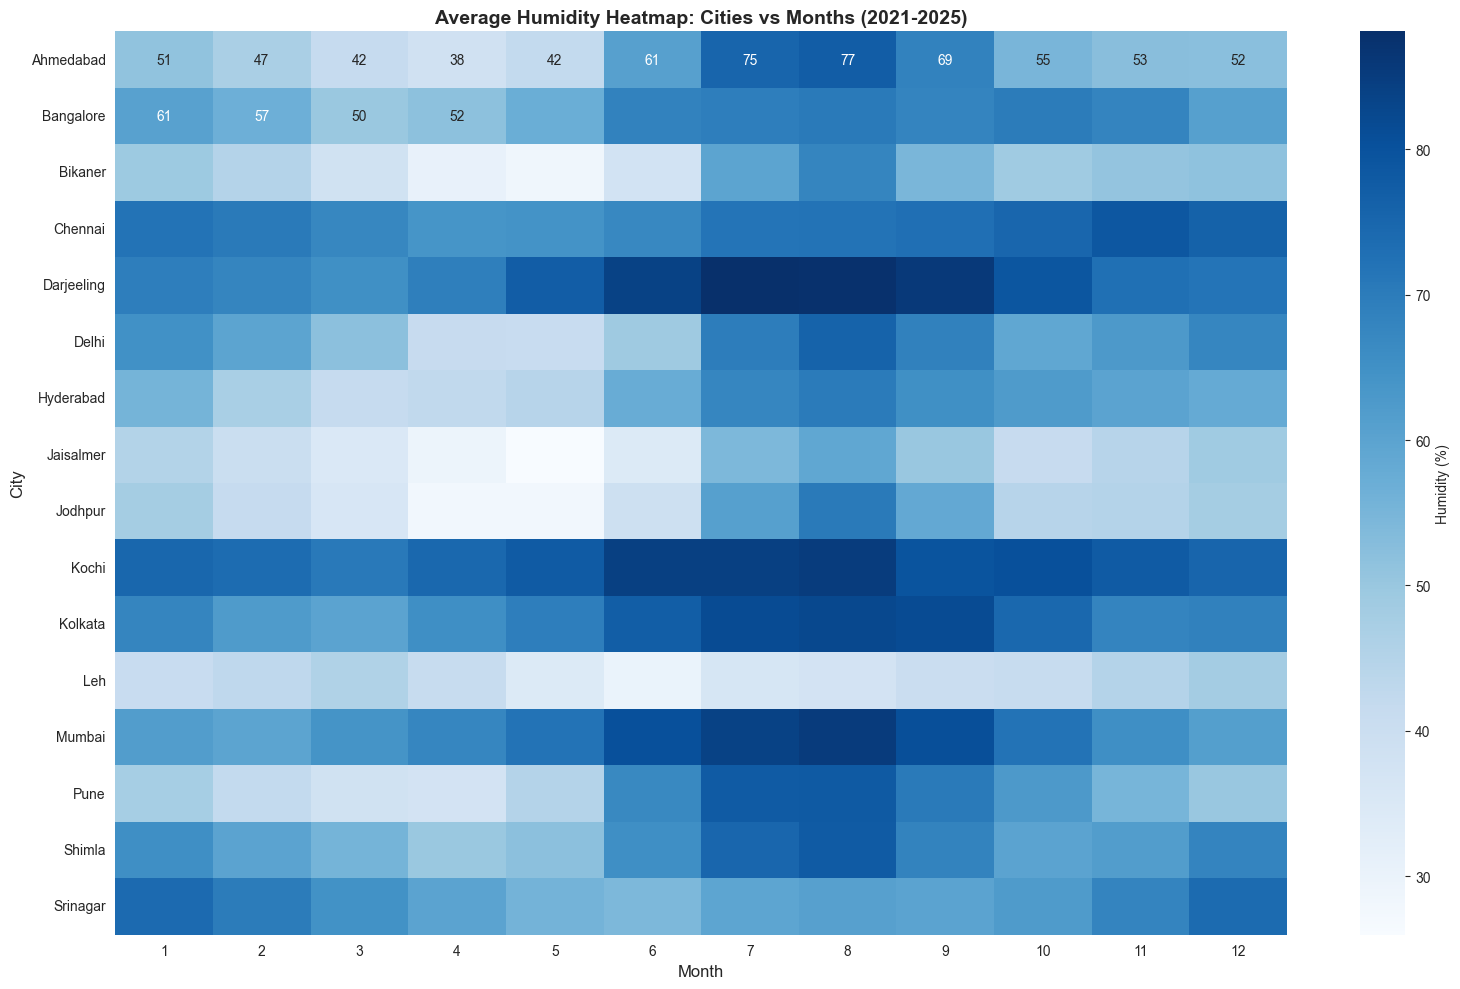

In [10]:
# Humidity heatmap
humidity_pivot = df.groupby(['City', 'Month'])['Humidity_Percent'].mean().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(humidity_pivot, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Humidity (%)'})
plt.title('Average Humidity Heatmap: Cities vs Months (2021-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

### 3.4 City-Season Matrix Heatmap

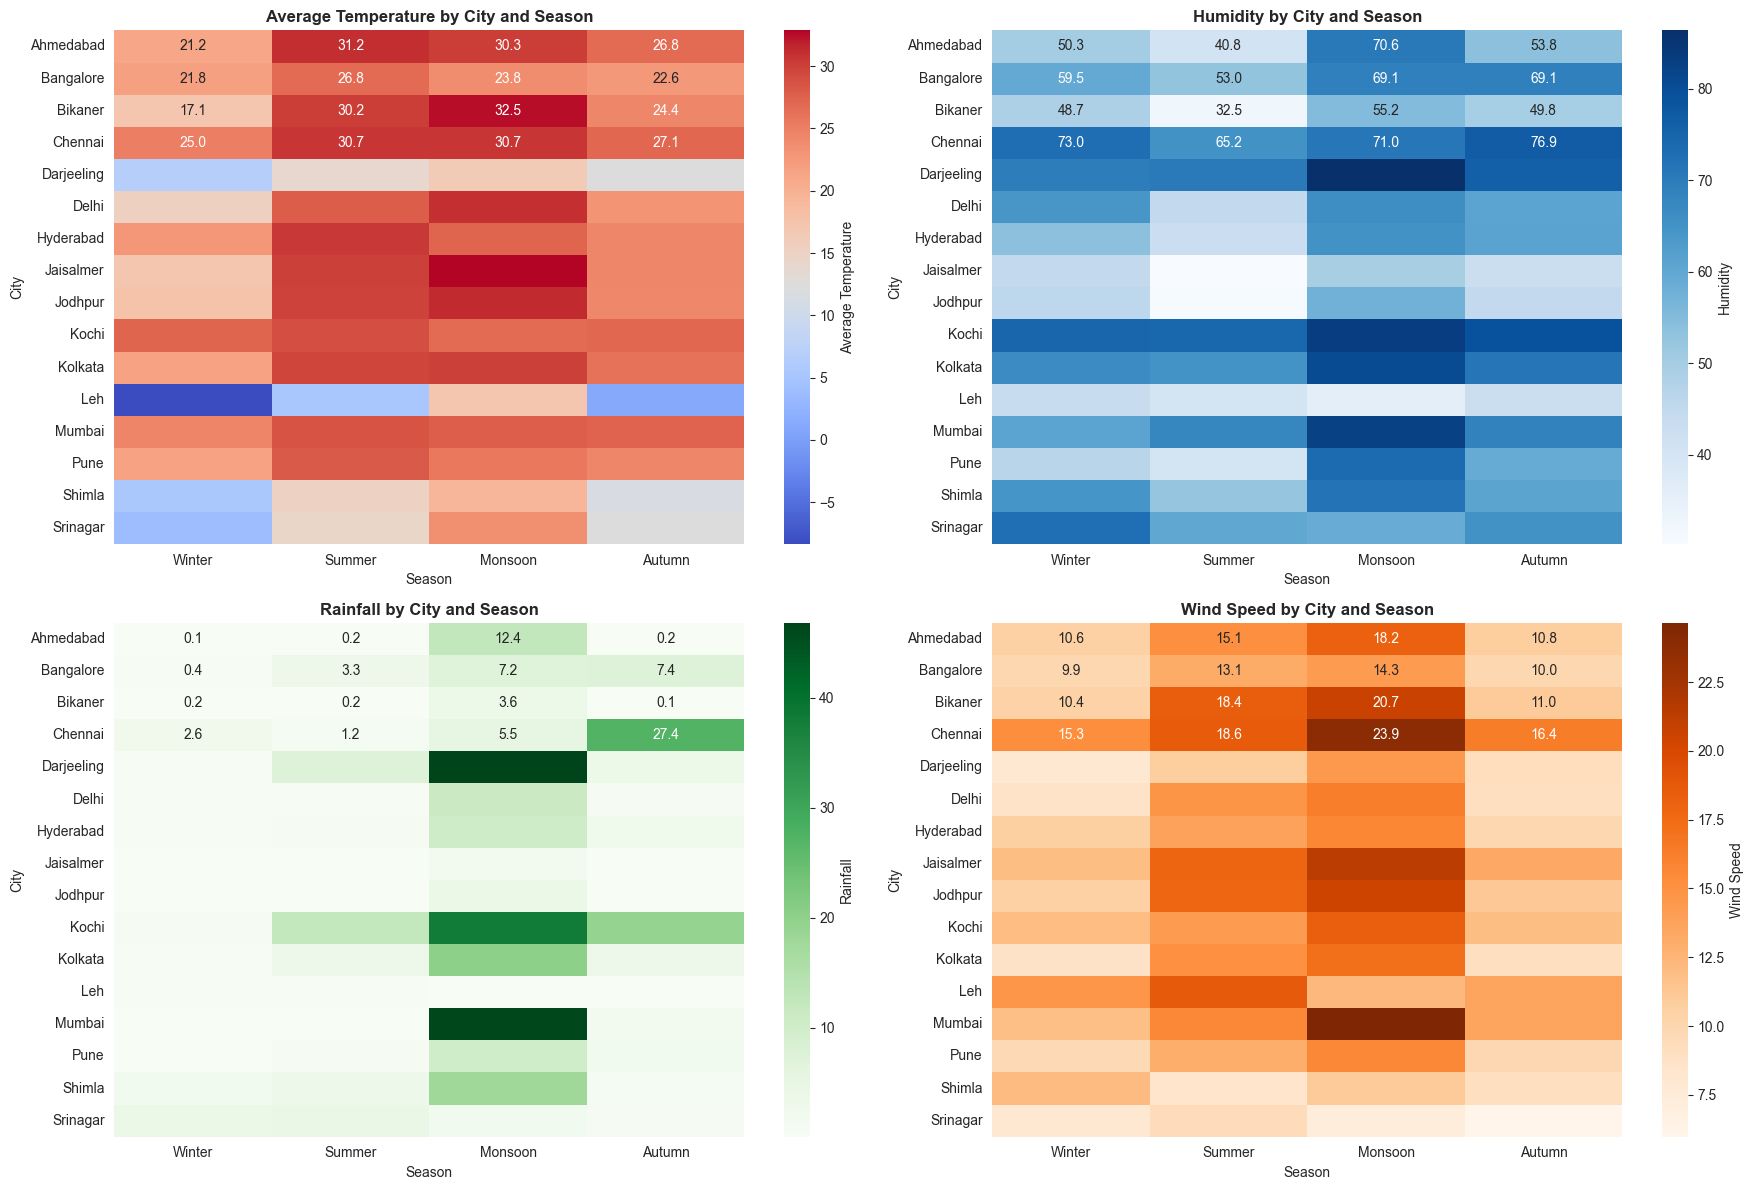

Season-wise averages:
         Temperature_Min_C  Temperature_Max_C  Avg_Temp  Humidity_Percent  \
Season                                                                      
Autumn               15.36              27.10     21.23             61.44   
Monsoon              22.09              31.24     26.67             67.32   
Summer               18.81              31.40     25.10             50.71   
Winter               10.05              22.62     16.34             58.78   

         Rainfall_mm  Wind_Speed_kmh  
Season                                
Autumn          4.48           10.87  
Monsoon        14.87           16.99  
Summer          2.43           14.68  
Winter          0.83           10.82  


In [11]:
# Create multi-metric heatmap by Season
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

metrics = ['Avg_Temp', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh']
titles = ['Average Temperature', 'Humidity', 'Rainfall', 'Wind Speed']
cmaps = ['coolwarm', 'Blues', 'Greens', 'Oranges']

for idx, (metric, title, cmap) in enumerate(zip(metrics, titles, cmaps)):
    ax = axes[idx // 2, idx % 2]
    season_pivot = df.groupby(['City', 'Season'])[metric].mean().unstack()
    # Reorder seasons
    season_order = ['Winter', 'Summer', 'Monsoon', 'Autumn']
    season_pivot = season_pivot[[s for s in season_order if s in season_pivot.columns]]
    
    sns.heatmap(season_pivot, annot=True, fmt='.1f', cmap=cmap, ax=ax, cbar_kws={'label': title})
    ax.set_title(f'{title} by City and Season', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Season-wise averages:")
print(df.groupby('Season')[numeric_cols].mean().round(2))

## 4. Geographic Visualizations

### 4.1 Interactive Map - Current Temperature Distribution

In [12]:
# Get latest data by city
latest_data = df.sort_values('Date').groupby('City').last().reset_index()

# Create base map (centered on India)
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles='OpenStreetMap')

# Add markers for each city
for _, row in latest_data.iterrows():
    # Color based on temperature
    if row['Avg_Temp'] < 15:
        color = 'blue'
        label = 'Cold'
    elif row['Avg_Temp'] < 25:
        color = 'green'
        label = 'Mild'
    elif row['Avg_Temp'] < 35:
        color = 'orange'
        label = 'Warm'
    else:
        color = 'red'
        label = 'Hot'
    
    popup_text = f"""<b>{row['City']}</b><br>
    Avg Temp: {row['Avg_Temp']:.1f}°C<br>
    Humidity: {row['Humidity_Percent']:.0f}%<br>
    Rainfall: {row['Rainfall_mm']:.1f}mm<br>
    Wind Speed: {row['Wind_Speed_kmh']:.1f} km/h<br>
    Condition: {row['Weather_Condition']}"""
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        popup=folium.Popup(popup_text, max_width=250),
        color=color,
        fill=True,
        fillColor=color,
        fillOpacity=0.7,
        weight=2
    ).add_to(m)

# Add legend
legend_html = '''<div style="position: fixed; 
                bottom: 50px; right: 50px; width: 150px; height: 160px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
                <b>Temperature Legend</b><br>
                <i style="background:blue; width: 15px; height: 15px; display: inline-block"></i> Cold (&lt;15°C)<br>
                <i style="background:green; width: 15px; height: 15px; display: inline-block"></i> Mild (15-25°C)<br>
                <i style="background:orange; width: 15px; height: 15px; display: inline-block"></i> Warm (25-35°C)<br>
                <i style="background:red; width: 15px; height: 15px; display: inline-block"></i> Hot (&gt;35°C)
                </div>'''
m.get_root().html.add_child(folium.Element(legend_html))

m.save('weather_map_temperature.html')
print("Interactive temperature map saved as 'weather_map_temperature.html'")
m

Interactive temperature map saved as 'weather_map_temperature.html'


### 4.2 Geographic Heatmap - Annual Average Temperature